# Parte 2: Matrices, colores y filtros

Se verán ejemplos de:
* Cómo trabajar con matrices
* Cómo manipular los valores de los pixeles
* Cómo aplicar operaciones a las matrices
* Cómo utilizar filtros


## Bibliotecas necesarias para trabajar

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Manipulación de matrices y sus elementos

### Se crea una imagen de tamaño 480x640, con todos los pixeles de color blanco

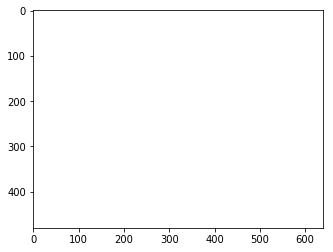

In [2]:
imagen = np.full((480, 640, 3), 255, np.uint8)
plt.imshow(imagen)

### Se crea una imagen de tamaño 480x640, con todos los pixeles de color rojo

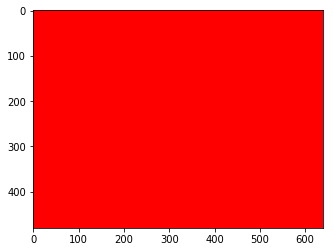

In [3]:
imagen = np.full((480, 640, 3), (255, 0, 0), np.uint8)
plt.imshow(imagen)

### Se cambian todos los valores a negro

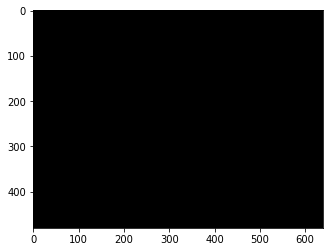

In [4]:
imagen.fill(0)
plt.imshow(imagen)

### Se cambian algunos pixeles a blanco

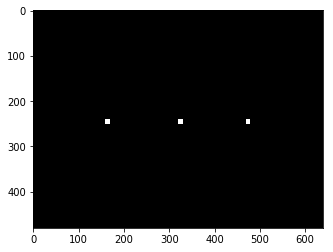

In [5]:
imagen[240:250, 160:170] = imagen[240:250, 320:330] = imagen[240:250, 470:480] = (255, 255, 255)
plt.imshow(imagen)

### Se cambian todos los valores de un canal

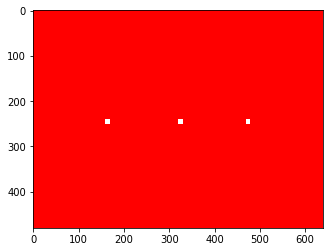

In [6]:
imagen[:, :, 0] = 255
plt.imshow(imagen)

### Se modifican los valores de diez líneas verticales completas en medio de la imagen

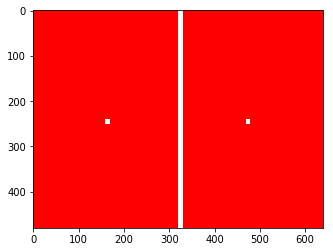

In [7]:
imagen[:, 320:330, :] = 255
plt.imshow(imagen)

### Se modifica cierta region del segundo canal de color

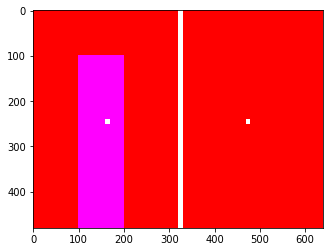

In [8]:
imagen[100:600, 100:200, 2] = 255
plt.imshow(imagen)

Las matrices en OpenCV son representadas con arreglos de Numpy, ya que
éste provee una basta serie de herramientas poderosas para la
manipulación de matrices, o también llamados *tensores*

## Conversión de tipos y escala de valores

Shape: (220, 220, 3)
Tipo de dato: uint8


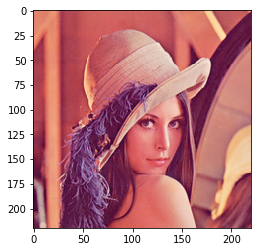

In [9]:
imagen = cv2.imread('img/lena.png')
print('Shape:', imagen.shape)
print('Tipo de dato:', imagen.dtype)
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB) # Para mostrar correctamente con pyplolt
plt.imshow(imagen)

### Convertir la imagen a una con elementos flotantes

In [10]:
imagen = imagen.astype(np.float32) / 255
print('Shape:', imagen.shape)
print('Tipo de dato:', imagen.dtype)

Shape: (220, 220, 3)
Tipo de dato: float32


### Escalar los elementos de la imagen dos veces y mapear al rango de [0, 1]

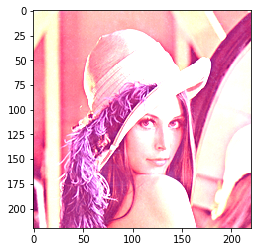

In [11]:
plt.imshow(np.clip(imagen*2, 0, 1))

### Regresar al rango de [0,255] y convertir al tipo entero sin signo

Shape: (220, 220, 3)
Tipo de dato: uint8


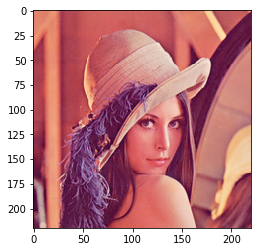

In [12]:
imagen = (imagen * 255).astype(np.uint8)
print('Shape:', imagen.shape)
print('Tipo de dato:', imagen.dtype)
plt.imshow(imagen)

## Persistencia de datos con Numpy

Se han visto ejemplos de cómo cargar (imread) y cómo guardar (imwrite) imágenes, sin embargo también es posible almacenar como matrices de Numpy.

### Se crea matriz de datos

In [13]:
matriz = np.random.rand(100, 100).astype(np.float32)
print('Shape:', matriz.shape)
print('Tipo de dato:', matriz.dtype)

Shape: (100, 100)
Tipo de dato: float32


### Se almacena con formato *.csv*

In [14]:
np.savetxt('matriz.csv', matriz)

### Se carga la matriz a partir del archivo creado

In [15]:
matriz = np.loadtxt('matriz.csv').astype(np.float32)
print('Shape:', matriz.shape)
print('Tipo de dato.', matriz.dtype)

Shape: (100, 100)
Tipo de dato. float32


## Manipular canales de la imagen

In [16]:
imagen = cv2.imread('img/lena.png').astype(np.float32) / 255
print('Shape:', imagen.shape)

Shape: (220, 220, 3)


### Intercambiar las bandas roja y azul

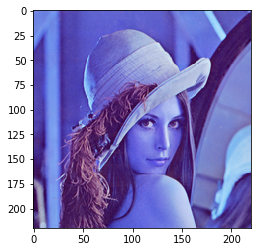

In [17]:
imagen[:, :, [0, 2]] = imagen[:, :, [2, 0]]
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

### Se regresan bandas y se escalan los valores para cambiar la coloración

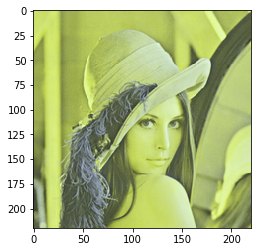

In [18]:
imagen[:, :, [0, 2]] = imagen[:, :, [2, 0]]
imagen[:, :, 0] = (imagen[:, :, 0] * 0.9).clip(0, 1)
imagen[:, :, 1] = (imagen[:, :, 0] * 1.1).clip(0, 1)
plt.imshow(imagen)


## Conversión del espacio de color

Por default el espacio de color utilizado por OpenCV esta representado
por el *BGR*. Sin embargo a veces es necesario utilizar algún otro espacio de color para realizar modificaciones.

In [19]:
imagen = cv2.imread('img/lena.png').astype(np.float32) / 255
print('Shape:', imagen.shape)
print('Tipo de dato:', imagen.dtype)

Shape: (220, 220, 3)
Tipo de dato: float32


### Convertir a escala de grises

In [20]:
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
gris = cv2.cvtColor(gris, cv2.COLOR_BGR2RGB) # Para mostrar con plt
print('Convertido a escala de grises')
print('Shape:', gris.shape)
print('Tipo de dato:', gris.dtype)
plt.imshow(gris)

Convertido a escala de grises
Shape: (220, 220, 3)
Tipo de dato: float32


### Convertir al espacio de color *HSV*

In [21]:
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
print('Convertida a HSV')
print('Shape:', hsv.shape)
print('Tipo de dato:',  hsv.dtype)
plt.imshow(hsv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Convertida a HSV
Shape: (220, 220, 3)
Tipo de dato: float32


### Incrementando el brillo de la imagen multiplicando el canal *V*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Convertida a RGB de HSV
Shape: (220, 220, 3)
Tipo de dato: float32


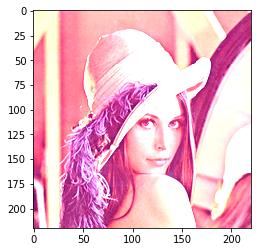

In [22]:
hsv[:, :, 2] *= 2
from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
print('Convertida a RGB de HSV')
print('Shape:', from_hsv.shape)
print('Tipo de dato:', from_hsv.dtype)
plt.imshow(from_hsv)

OpenCV soporta hasta 200 tipos de conversión, utilizando la función `cvtColor`

### Correción de Gamma

In [23]:
gamma = 0.5
imagen = cv2.imread('img/lena.png', 0).astype(np.float32) / 255
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
img_corregida = np.power(imagen, gamma)
plt.imshow(img_corregida)

## Normalización de media y variancia

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


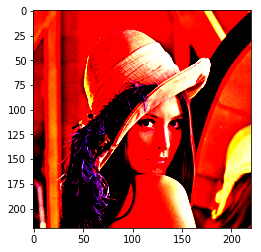

In [24]:
imagen = cv2.imread('img/lena.png').astype(np.float32) / 255
imagen -= imagen.mean()
imagen /= imagen.std()
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)


Para la desviación estándar también se puede utilizar la función `cv2.meanStdDev`

## Histograma

In [25]:
imagen_gris = cv2.imread('img/lena.png', 0)
histograma, bins = np.histogram(imagen_gris, 256, [0, 255])
plt.fill(histograma)
plt.xlabel('Valor del pixel')
plt.show()

OpenCV también cuenta con su función para calcular el histograma: `cv2.calcHist`

## Ecualizar el histograma

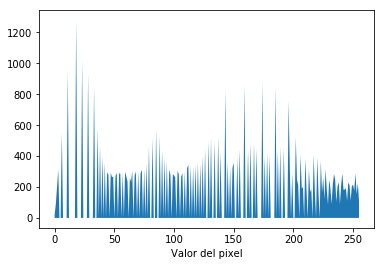

In [26]:
imagen_gris = cv2.imread('img/lena.png', 0)
imagen_ecualizada = cv2.equalizeHist(imagen_gris)
histograma, bins = np.histogram(imagen_ecualizada, 256, [0, 255])
plt.fill_between(range(256), histograma, 0)
plt.xlabel('Valor del pixel')
plt.show()

#### Imagen original

In [27]:
imagen_gris = cv2.cvtColor(imagen_gris, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_gris)

#### Imagen después de ecualizar su histograma

In [28]:
imagen_ecualizada = cv2.cvtColor(imagen_ecualizada, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_ecualizada)

### Ecualizar en las bandas de color

A continuación se transforma al espacio de color HSV y se ecualiza la
banda V.

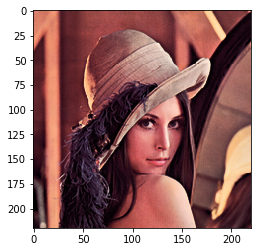

In [29]:
imagen = cv2.imread('img/lena.png')
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
hsv[..., 2] = cv2.equalizeHist(hsv[..., 2])
color_equalizada = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(color_equalizada)

#### Imagen original

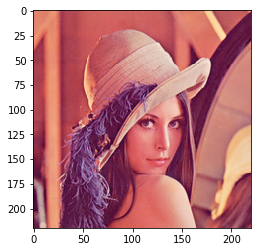

In [30]:
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

## Remover ruido con filtros

### Se crea imagen con ruido

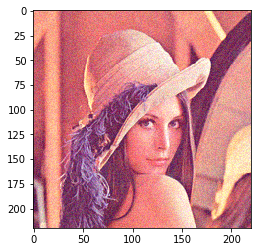

In [31]:
imagen = cv2.imread('img/lena.png').astype(np.float32) / 255
imagen_ruido = (imagen + 0.2 * np.random.rand(*imagen.shape).astype(np.float32))
imagen_ruido = imagen_ruido.clip(0, 1)
plt.imshow(imagen_ruido[:, :, [2,1,0]])

### Filtro Gaussiano difuminado

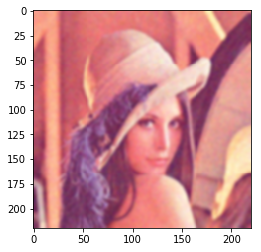

In [32]:
gaussiano = cv2.GaussianBlur(imagen_ruido, (7, 7), 0)
plt.imshow(gaussiano[:, :, [2,1,0]])

Se toman como parámetros:
* La imagen
* Tamaño del kernel (debe ser positivo y de tamaño impar) 
* Desviación estándar

### Filtro Promediador

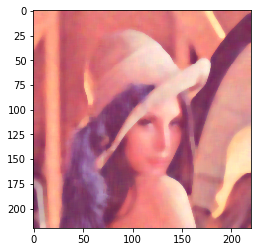

In [33]:
promediador = cv2.medianBlur((imagen_ruido * 255).astype(np.uint8), 7)
plt.imshow(promediador[:, :, [2, 1, 0]])

Se toman como parámetros:
* La imagen
* Tamaño del kernel (debe ser positivo y de tamaño impar) 

### Filtro Bilateral

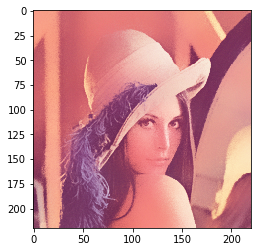

In [34]:
bilateral = cv2.bilateralFilter(imagen_ruido, -1, 0.3, 10)
plt.imshow(bilateral[:, :, [2,1,0]])

Se toman como parámetros:
* La imagen
* Tamaño de la ventana
* Color
* Valores espaciales sigma

## Calculando el gradiente con el operador de Sobel

Se obtienen las derivadas en ambas direcciones de la imagen

In [35]:
imagen = cv2.imread('img/lena.png', 0)
dx = cv2.Sobel(imagen, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(imagen, cv2.CV_32F, 0, 1)

#### Imagen original

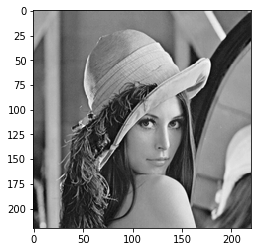

In [36]:
plt.imshow(imagen, cmap='gray')

#### Dirección X

In [37]:
plt.imshow(dx, cmap='gray')

#### Dirección Y

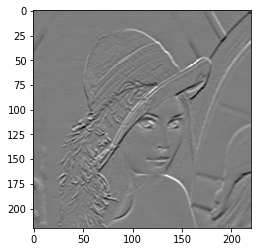

In [38]:
plt.imshow(dy, cmap='gray')

## Filtro personalizado

Bibliotecas extra:

In [39]:
import math

Se carga imagen a procesar:

In [40]:
imagen = cv2.imread('img/lena.png')

Se definen parámetros para el filtro:

In [41]:
TAMANIO_KERNEL = 11
ALFA = 2

Se define el filtro:

In [42]:
kernel = cv2.getGaussianKernel(TAMANIO_KERNEL, 0)
kernel = -ALFA * kernel @ kernel.T
kernel[TAMANIO_KERNEL//2, TAMANIO_KERNEL//2] += 1 + ALFA

> En este contexto el operador *@* se utiliza para la multiplicación de matrices

Se filtra la imagen:

In [43]:
imagen_filtrada = cv2.filter2D(imagen, -1, kernel)

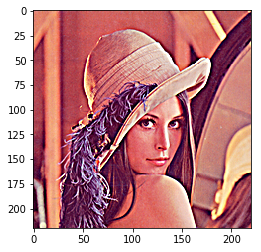

In [44]:
plt.imshow(imagen_filtrada[:,:,[2,1,0]])

#### Imagen original

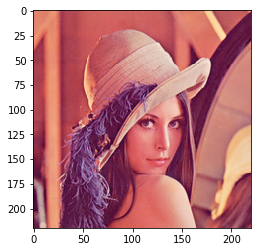

In [45]:
plt.imshow(imagen[:,:,[2,1,0]])

## Filtros de Gabor

In [46]:
imagen = cv2.imread('img/lena.png', 0).astype(np.float32) / 255

#### Se crea el kernell y se normaliza

Los parámetros que toma son:
* Tamaño del kernel
* Desviación estándar
* Orientación de la onda
* Longitud de la onda
* Radio espacial
* Fase

In [47]:
kernel = cv2.getGaborKernel((21, 21), 5, 1, 10, 1, 0, cv2.CV_32F)
kernel /= math.sqrt((kernel * kernel).sum())

#### Se aplica el kernel

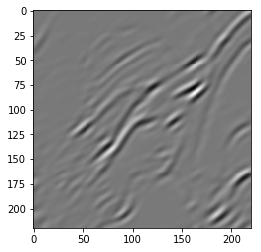

In [48]:
imagen_filtrada = cv2.filter2D(imagen, -1, kernel)
plt.imshow(imagen_filtrada, cmap='gray')

## Dominio espacial con la transformada de Fourier

In [49]:
imagen = cv2.imread('img/lena.png',0).astype(np.float32) / 255

#### Aplicar la transformada discreta de Fourier

In [50]:
fft = cv2.dft(imagen, flags=cv2.DFT_COMPLEX_OUTPUT)

#### Visualizar el espectro como una imagen

In [51]:
espectro_centrado = np.fft.fftshift(fft, axes=[0, 1])
magnitud = cv2.magnitude(espectro_centrado[:, :, 0], espectro_centrado[:, :, 1])
magnitud = np.log(magnitud)
plt.imshow(magnitud, cmap='gray')

#### Regresar del dominio de la frecuencia al espacial

In [52]:
imagen_restaurada = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
plt.imshow(imagen_restaurada, cmap='gray')

## Manipulando frecuencias para filtrar imagen

In [53]:
imagen = cv2.imread('img/lena.png',0).astype(np.float32) / 255

#### Se obtiene el espectro y se centra

In [54]:
fft = cv2.dft(imagen, flags=cv2.DFT_COMPLEX_OUTPUT)
fft_centrada = np.fft.fftshift(fft, axes=[0, 1])

#### Se cambia la amplitud a 0 de las frecuencias altas

In [55]:
sz = 25
mascara = np.zeros(fft_centrada.shape, np.uint8)
mascara[mascara.shape[0]//2-sz:mascara.shape[0]//2+sz,
       mascara.shape[1]//2-sz:mascara.shape[1]//2+sz, :] = 1
fft_centrada *= mascara

#### Se invierte operación de desplazamiento en el espectro

In [56]:
fft = np.fft.ifftshift(fft_centrada, axes=[0, 1])

#### Se regresa al dominio espacial

In [57]:
imagen_filtrada = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

#### Imagen original

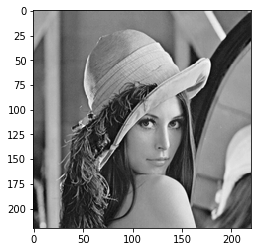

In [58]:
plt.imshow(imagen, cmap='gray')

#### Imagen filtrada

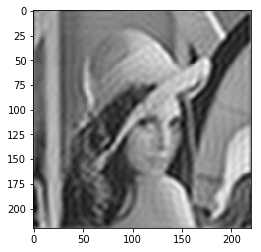

In [59]:
plt.imshow(imagen_filtrada, cmap='gray')

## Transformar a una imagen binaria con diferentes umbrales

OpenCV cuenta con tres tipos de metodos para crear una imagen binaria. Se pueden dividir en dos grupos, uno en el cual se aplica el mismo umbral para todos los pixeles por igual y otro donde el umbral aplicado
dependerá del valor del pixel.

In [63]:
imagen = cv2.imread('img/lena.png', 0)

#### Aplicar transformación simple

Para el método del grupo una existe la función `cv2.threshold`

In [64]:
umbral, mascara = cv2.threshold(imagen, 200, 1, cv2.THRESH_BINARY)
print('Umbral usado:', umbral)

Umbral usado: 200.0


#### Aplicar umbral adaptativo

In [65]:
umbral_adaptativo = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 10)

#### Imagen original

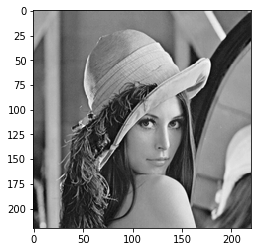

In [66]:
plt.imshow(imagen, cmap='gray')

#### Umbral simple

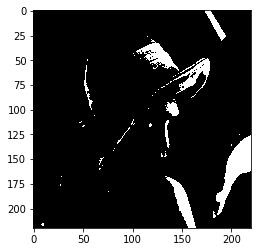

In [67]:
plt.imshow(mascara, cmap='gray')

#### Umbral adaptativo

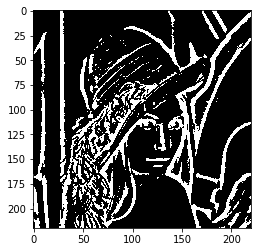

In [69]:
plt.imshow(umbral_adaptativo, cmap='gray')

## Operadores morfológicos

Se muestra la aplicación básica de los operadores morfológicos a imágenes
binarias.

In [86]:
imagen = cv2.imread('img/lena.png', 0)

#### Convertir a imagen binaria con método de Otsu

In [87]:
__, binaria = cv2.threshold(imagen, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#### Aplicar erosión y dilatación 10 veces con una máscara de 3x3

In [88]:
erosion = cv2.morphologyEx(binaria, cv2.MORPH_ERODE, (3, 3), iterations=10)
dilatacion = cv2.morphologyEx(binaria, cv2.MORPH_DILATE, (3, 3), iterations=10)

#### Aplicar apertura y cierre 5 veces usando una estructura elíptica de 5x5 

In [89]:
apertura = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=5)
cierre = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=5)

#### Calcular el gradiente morfológico

In [90]:
gradiente = cv2.morphologyEx(binaria, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

#### Imagen binaria

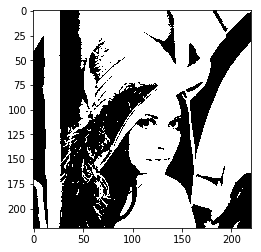

In [91]:
plt.imshow(binaria, cmap='gray')

#### Erosión

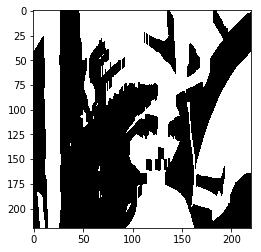

In [92]:
plt.imshow(erosion, cmap='gray')

#### Dilatación

In [93]:
plt.imshow(dilatacion, cmap='gray')

#### Apertura

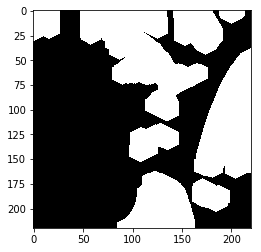

In [94]:
plt.imshow(apertura, cmap='gray')

#### Cierre

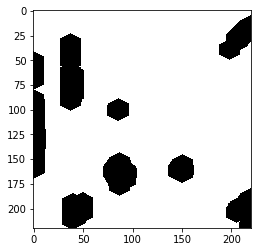

In [95]:
plt.imshow(cierre, cmap='gray')

#### Gradiente

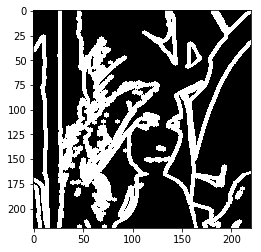

In [96]:
plt.imshow(gradiente, cmap='gray')

## Operaciones binarias

Se crea una imagen binaria con un círculo

In [102]:
imagen_circulo = np.zeros((500, 500), np.uint8)
cv2.circle(imagen_circulo, (250, 250), 100, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Se crea una imagen binaria con un rectangulo

In [103]:
imagen_rectangulo = np.zeros((500, 500), np.uint8)
cv2.rectangle(imagen_rectangulo, (100, 100), (400, 250), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Combinando las figuras usando la operación AND punto a punto

In [113]:
imagen_and = imagen_circulo & imagen_rectangulo

#### Combinando las figuras usando la operación OR punto a punto

In [114]:
imagen_or = imagen_circulo | imagen_rectangulo

#### Círculo

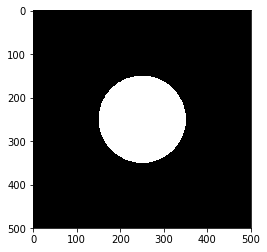

In [108]:
plt.imshow(imagen_circulo, cmap='gray')

#### Rectángulo

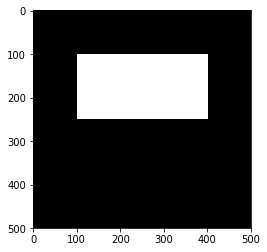

In [110]:
plt.imshow(imagen_rectangulo, cmap='gray')

#### Operación AND

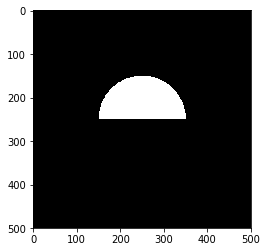

In [115]:
plt.imshow(imagen_and, cmap='gray')

#### Operación OR

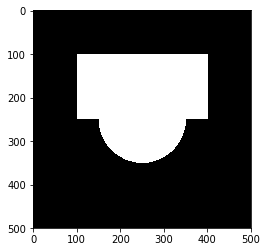

In [116]:
plt.imshow(imagen_or, cmap='gray')